### import all the necessary libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import re

### import the train and tha test data

In [102]:
data_training = pd.read_csv('train.csv', sep=',',low_memory=False)
data_testing = pd.read_csv('test.csv',sep=',')

# Understanding the Structure of Data

In [103]:
# display the first 5 rows from the data
data_training.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [104]:
# display the last 5 rows from the data
data_training.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.6736955618808,Poor


In [105]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

We notice that there are inconsistencies in the data types within certain columns. For example, the columns representing Age, Annual Income, and Monthly Balance are currently labeled as objects, which may lead to misinterpretation of their actual numerical values. This misclassification could potentially affect subsequent analyses or modeling processes.

In [106]:
data_training.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


From this basic statistical information, it's apparent that there may be outliers in the dataset. This suspicion arises from the substantial differences between the mean and standard deviation in certain features, such as Total EMI per month, Interest Rate, and Number of Bank Accounts. Additionally, comparing the minimum and maximum values across features highlights significant gaps, further suggesting the presence of outliers in the data. Identifying and addressing these outliers may be crucial for ensuring the accuracy and reliability of subsequent analyses or modeling efforts.

# Handling Missing Values

In [107]:
null_columns = data_training.columns[data_training.isnull().any()]
round(data_training[null_columns].isnull().sum()/data_training.shape[0]*100,2)

Name                        9.98
Monthly_Inhand_Salary      15.00
Type_of_Loan               11.41
Num_of_Delayed_Payment      7.00
Num_Credit_Inquiries        1.96
Credit_History_Age          9.03
Amount_invested_monthly     4.48
Monthly_Balance             1.20
dtype: float64

In [108]:
# calculat how much we going to loss if we drop the NaN values from all columns using dropna function
def we_loss(data):
    copy = data.copy()
    shape = copy.shape[0]
    copy.dropna(inplace=True)
    count = round(((shape - copy.shape[0]) / shape) * 100, 2)
    return count
loss = we_loss(data_training)
print(f"If we drop NaN values for all columns, we're going to lose {loss}% of the data.")

If we drop NaN values for all columns, we're going to lose 46.95% of the data.


With 8 columns containing NaN values, dropping them directly could result in losing a significant portion of the data. Hence, a more prudent approach would be to handle these NaN values individually for each column by filling them with appropriate values.

**Name column**

In [109]:
# sense we have 9% of massing value in the Name column we going to fill them with mode
data_training['Name'] = data_training['Name'].fillna(data_training['Name'].mode()[0])

**Monthly_Inhand_Salary**

we have 15% of missing value for Monthly_Inhand_Salary so the beter way is to impute the missing values based on average salaries for similar occupation positions 

In [110]:
data_training['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [111]:
occupation = data_training['Occupation'].unique()

for occ in occupation:
    mask = data_training['Occupation'] == occ
    mean_salary = data_training.loc[mask, 'Monthly_Inhand_Salary'].mean()
    data_training.loc[mask, 'Monthly_Inhand_Salary'] = data_training.loc[mask, 'Monthly_Inhand_Salary'].fillna(mean_salary)


**Type_of_Loan**

In [112]:
data_training['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [113]:
#calculat how much diferent Type_of_Loan we have
len(data_training['Type_of_Loan'].unique())

6261

In [114]:
data_training['Type_of_Loan'].mode()

0    Not Specified
Name: Type_of_Loan, dtype: object

We have identified that 11% of the entries in the 'Type_of_Loan' column are missing. Given that there are 6261 unique values in this column, the most common value, which also represents the mode, is 'Not Specified'. Therefore, it is reasonable to fill the missing values in the 'Type_of_Loan' column with 'Not Specified' to maintain consistency and minimize data loss.

In [115]:
data_training['Type_of_Loan'] = data_training['Type_of_Loan'].fillna('Not Specified')

**Num_of_Delayed_Payment**

We've observed that there are 7% missing values in the 'Num_of_Delayed_Payment' column. Additionally, it appears that this column is represented as an object datatype. Given this situation, we'll fill the missing values in this column with 0 to ensure data integrity and consistency.

In [116]:
#data_training['Num_of_Delayed_Payment'].fillna(data_training['Num_of_Delayed_Payment'].mode()[0], inplace=True)
data_training.fillna({'Num_of_Delayed_Payment':data_training['Num_of_Delayed_Payment'].mode()[0]}, inplace=True)

**Num_Credit_Inquiries**

we have almost 2% of missing value so we fill them with 0 only to kep the data and not los any information

In [117]:
# we fill this column with 0
data_training.fillna({"Num_Credit_Inquiries":0},inplace=True)

**Credit_History_Age**

Since Credit_History_Age likely represents a str value, we can fill the missing values with the mode of the column, depending on the Occupation of the customers

In [118]:
occupation = data_training['Occupation'].unique()

for occ in occupation:
    mask = data_training['Occupation'] == occ
    mean_salary = data_training.loc[mask, 'Credit_History_Age'].mode()[0]
    data_training.loc[mask, 'Credit_History_Age'] = data_training.loc[mask, 'Credit_History_Age'].fillna(mean_salary)


**Amount_invested_monthly**

fill this column with 0

In [119]:
# we fill this column with 0
data_training.fillna({"Amount_invested_monthly":"0"},inplace=True)

**Monthly_Balance**

In [120]:
# we fill this column with 0
data_training.fillna({"Monthly_Balance":"0"},inplace=True)

#### Check if we still have any missing values in the data

In [121]:
null_columns = data_training.columns[data_training.isnull().any()]
round(data_training[null_columns].isnull().sum()/data_training.shape[0]*100,2)

Series([], dtype: float64)

# Data Cleaning

#### - **Check for duplicate**

In [122]:
data_training[data_training.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


#### - **Data Type Conversion**

We have some columns that need to be converted to their original data types. For example, the Age column is currently represented as an object instead of an integer, and the annual income column is also in an incorrect format.

In [123]:
non_numeric = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
                'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
def clean_and_convert(value):
    # Remove non-numeric characters except for the decimal point
    cleaned_value = re.sub(r'[^\d.]', '', str(value))
    # Convert the cleaned value to a floating-point number, handling non-finite values
    try:
        return float(cleaned_value)
    except ValueError:
        return np.nan  # Return NaN for non-finite values



In [124]:
# Apply the function
for col in non_numeric:
    # Remove non-numeric characters and convert to floating-point numbers
    data_training[col] = data_training[col].apply(clean_and_convert)


In [128]:
# Fill NaN values with 0 before converting to integers
data_training[non_numeric] = data_training[non_numeric].fillna(0)

In [130]:
# Convert the columns to integers
#data_training[non_numeric] = data_training[non_numeric].astype(float)

**Now we will investigate each column to see if there are any issues in data entry or anything that needs correction.**

In [26]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              100000 non-null  ob

#### - **Outliers**

# EDA

# Data Preprocessing

Text(0.5, 1.0, 'Distribution of number of tokens in tweets')

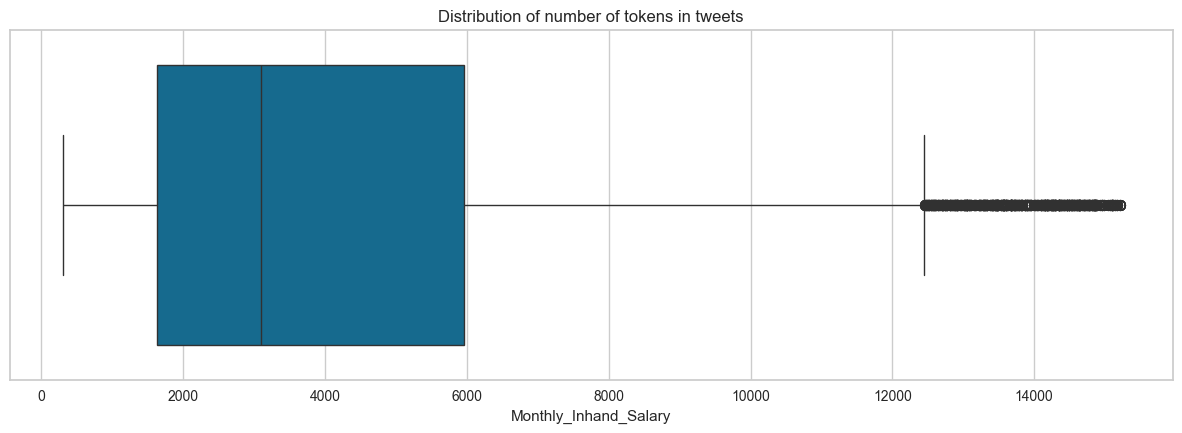

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(x=data_training["Monthly_Inhand_Salary"])
plt.title(('Distribution of number of tokens in tweets'))

#plt.subplot(2,1,2)
#sns.distplot(x=data_training["Monthly_Inhand_Salary"])